In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import datetime

In [2]:
carmax_df = pd.read_csv('CaseCompetitionData2021.csv')
carmax_df['customer_income'] = carmax_df['customer_income'].replace('?','Unspecified')
print("Data Shape:",carmax_df.shape)
carmax_df.head()

Data Shape: (355874, 15)


,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,0,8,?,0,1
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,1,19,?,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,1,21,?,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,0,8,?,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,1,5,?,1,1


### Income Brackets

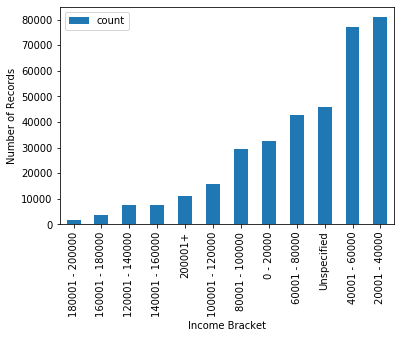

In [3]:
ax = (
carmax_df.groupby('customer_income')
    .count()['insert_num']
    .reset_index().rename(columns={"insert_num":"count"})
    .sort_values(by='count')
    .plot.bar(x='customer_income',y='count')
)
_= ax.set_xlabel("Income Bracket")
_=ax.set_ylabel("Number of Records")

Alright from this analysis we see most items are within 20001 - 40000

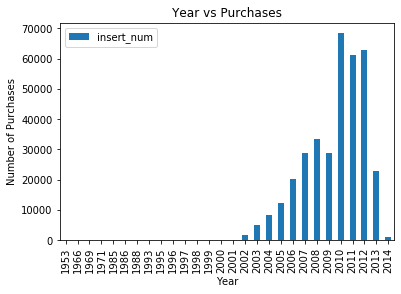

In [5]:
ax = (
    carmax_df.groupby(["purchase_vehicle_year"])
    .count().reset_index()
    .sort_values(by="purchase_vehicle_year", ascending=True)
    .plot.bar(x="purchase_vehicle_year", y="insert_num")
)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Purchases")
_ = ax.set_title("Year vs Purchases")

In [6]:
carmax_df.groupby(['customer_income','purchase_vehicle_year']).count()

insert_num  purchase_make  \
customer_income purchase_vehicle_year                              
0 - 20000       1995                            1              1   
                1996                            2              2   
                1999                            3              3   
                2000                            2              2   
                2001                           16             16   
                2002                          260            260   
                2003                          624            624   
                2004                          920            920   
                2005                         1318           1318   
                2006                         2040           2040   
                2007                         2730           2730   
                2008                         2984           2984   
                2009                         2505           2505   
                2010                         6042           6042   
                2011                         5430           5430   
                2012                         5674           5674   
                2013                         2018           2018   
                2014                           84             84   
100001 - 120000 1988                            1              1   
                2001                            2              2   
                2002                           48             48   
                2003                          166            166   
                2004                          292            292   
                2005                          378            378   
                2006                          774            774   
                2007                         1165           1165   
                2008                         1523           1523   
                2009                         1303           1303   
                2010                         3192           3192   
                2011                         2810           2810   
...                                           ...            ...   
80001 - 100000  2009                         2511           2511   
                2010                         5948           5948   
                2011                         5174           5174   
                2012                         5273           5273   
                2013                         2315           2315   
                2014                          108            108   
Unspecified     1969                            1              1   
                1971                            1              1   
                1985                            1              1   
                1986                            1              1   
                1988                            1              1   
                1993                            1              1   
                1995                            4              4   
                1998                            2              2   
                1999                            6              6   
                2000                           21             21   
                2001                           44             44   
                2002                          266            266   
                2003                          561            561   
                2004                          877            877   
                2005                         1404           1404   
                2006                         2158           2158   
                2007                         3128           3128   
                2008                         3960           3960   
                2009                         3458           3458   
                2010                         9105           9105   
                2011       

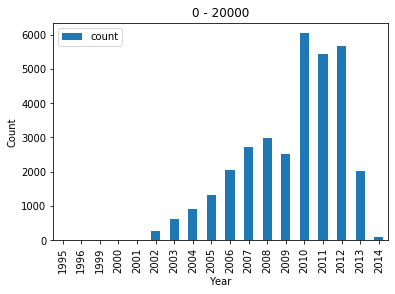

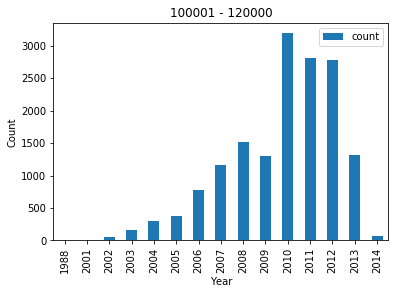

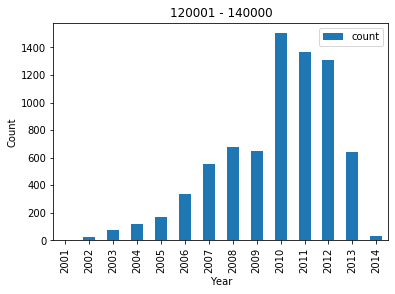

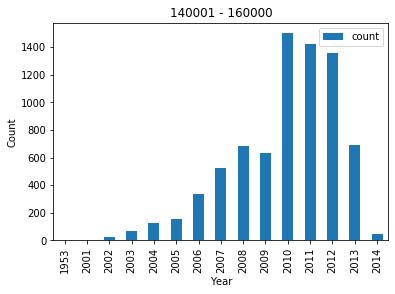

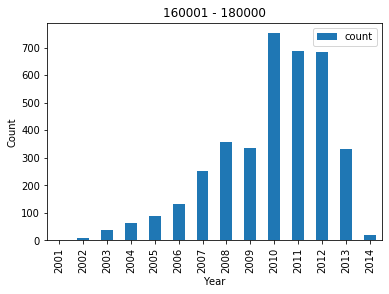

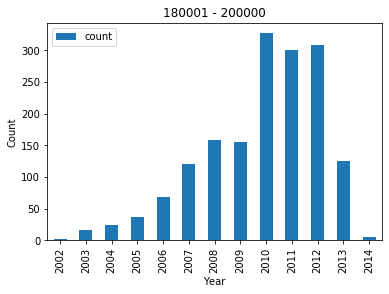

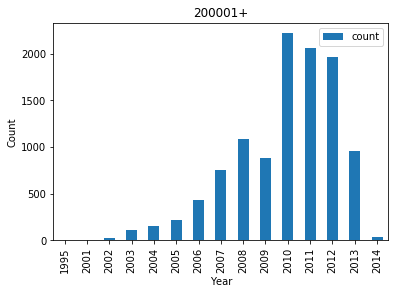

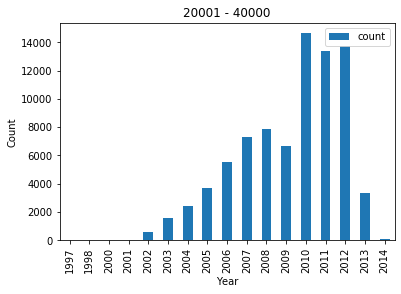

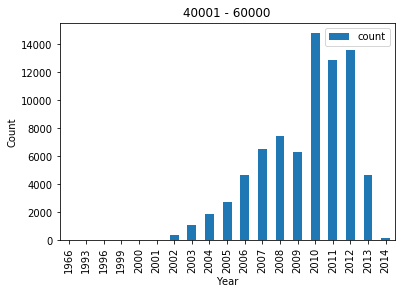

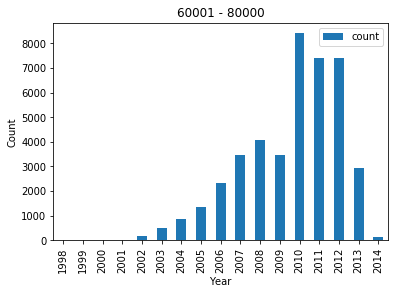

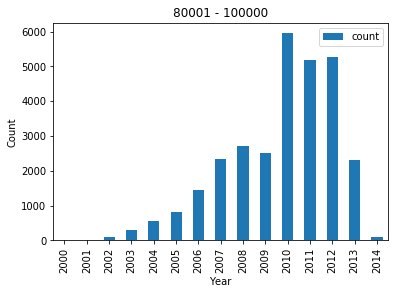

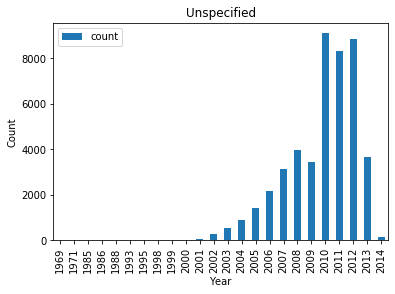

In [7]:
income_counts = carmax_df.groupby(['customer_income','purchase_vehicle_year']).count().reset_index()[['customer_income','purchase_vehicle_year','insert_num']].rename(columns={"insert_num":"count"})
#income_counts['purchase_vehicle_year'] = pd.to_datetime(income_counts['purchase_vehicle_year'].apply(str))

for i in income_counts['customer_income'].unique():
    ax = income_counts[income_counts.customer_income == i].plot.bar(x='purchase_vehicle_year',y='count')
    _= ax.set_xlabel("Year")
    _=ax.set_ylabel("Count")
    plt.title(i)
    #plt.ylim(0,income_counts['count'].max())
    